In [1]:
from __future__ import print_function
import os
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from subprocess import Popen,PIPE,STDOUT,call

In [2]:
from IPython.core.pylabtools import figsize
figsize(20, 10)

In [3]:
def tree(prefix='Sherpa', directory='', depth=2):
    proc=Popen('tree -L {depth} {prefix}Results/'.format(depth=depth, prefix=prefix) +directory, shell=True, stdout=PIPE, )
    output=proc.communicate()[0]
    print(output)
    
def loss_plot(df):    
    sns.lineplot(x='Iteration',y='loss',data=df,label='loss')
    sns.lineplot(x='Iteration',y='val_loss',data=df,label='val loss'); 
    
def view_hyper_params(df):
    params = ['net_type', 'loss_type', 'lr', 'num_layers', 'dropout', 'batch_norm', 'Trial-ID', 'val_loss']
    for param in params:
        if param == 'val_loss':
            print(param, ':', df[param].min())
        else:
            try: print(param, ':', df[param].unique()[0])
            except: pass
        
def plot(folder):
    model_types = ['normal_mse', 'normal_weak_loss', 'conservation_mse', 'conservation_weak_loss']
    min_loss = 1e10
    min_loss_trial = None
    for idx, model in enumerate(model_types):
        df = pd.read_csv('SherpaResults/{}/{}/output/results.csv'.format(folder, model))
        bad_trials = df[(df['val_loss'] < 1000) & (df['val_loss'] > 0)]['Trial-ID'].unique()
        df = df[df['Trial-ID'].isin(bad_trials)].reset_index()
        
        plt.subplot(2,2,idx+1)
        plt.title(model.replace('_', ' '))
        plt.ylim(50, 500)
        loss_plot(df)
        
        best_trial_ID = df.iloc[df['val_loss'].idxmin()]['Trial-ID']
        
        best_trial_df = df[df['Trial-ID'] == best_trial_ID]
        min_loss = min(min_loss, best_trial_df['val_loss'].min())
        
        if min_loss == best_trial_df['val_loss'].min():
            min_loss_trial = best_trial_df
    
    plt.subplots_adjust(hspace = 0.4)
    plt.show()
    return min_loss_trial

# Sherpa Results
---

In [5]:
tree()

SherpaResults/
├── 8col
│   └── normal_mse
├── 8col_local
│   └── normal_mse
├── 8col_random
│   └── normal_mse
├── fluxbypass_aqua
│   ├── conservation_mse
│   ├── conservation_weak_loss
│   ├── normal_mse
│   └── normal_weak_loss
├── fluxbypass_aqua_local
│   ├── conservation_mse
│   ├── conservation_weak_loss
│   ├── normal_mse
│   └── normal_weak_loss
├── fluxbypass_aqua_random_search
│   ├── conservation_mse
│   ├── conservation_weak_loss
│   ├── normal_mse
│   └── normal_weak_loss
├── land_data
│   └── normal_mse
└── land_data_random
    └── normal_mse

25 directories, 0 files



# Random Search


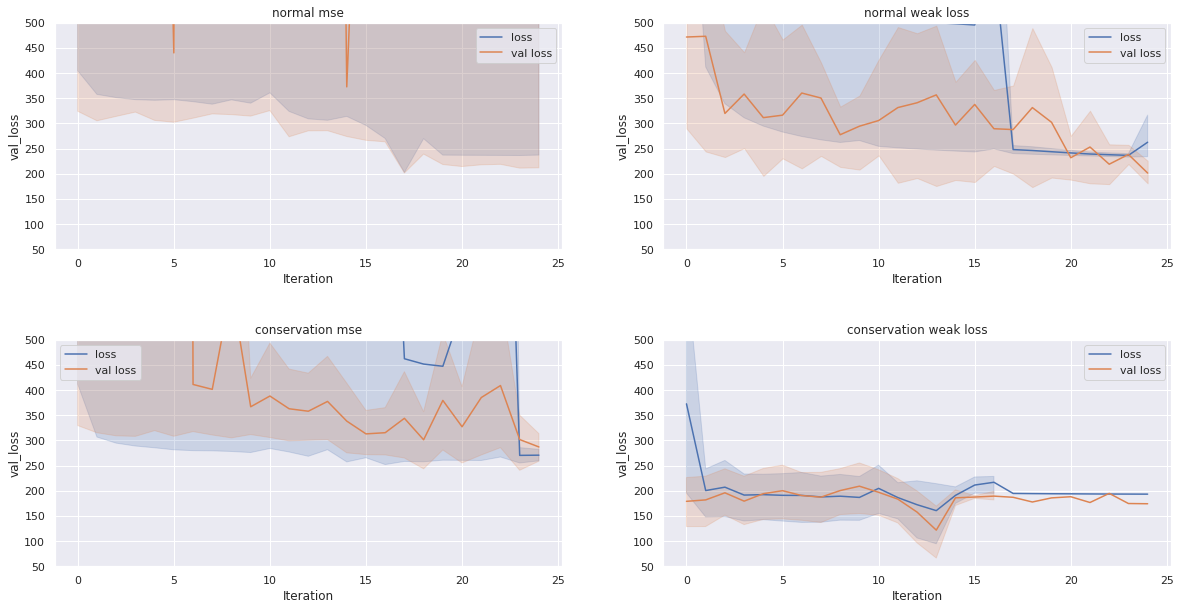

In [6]:
best_random_search_trial = plot('fluxbypass_aqua_random_search')

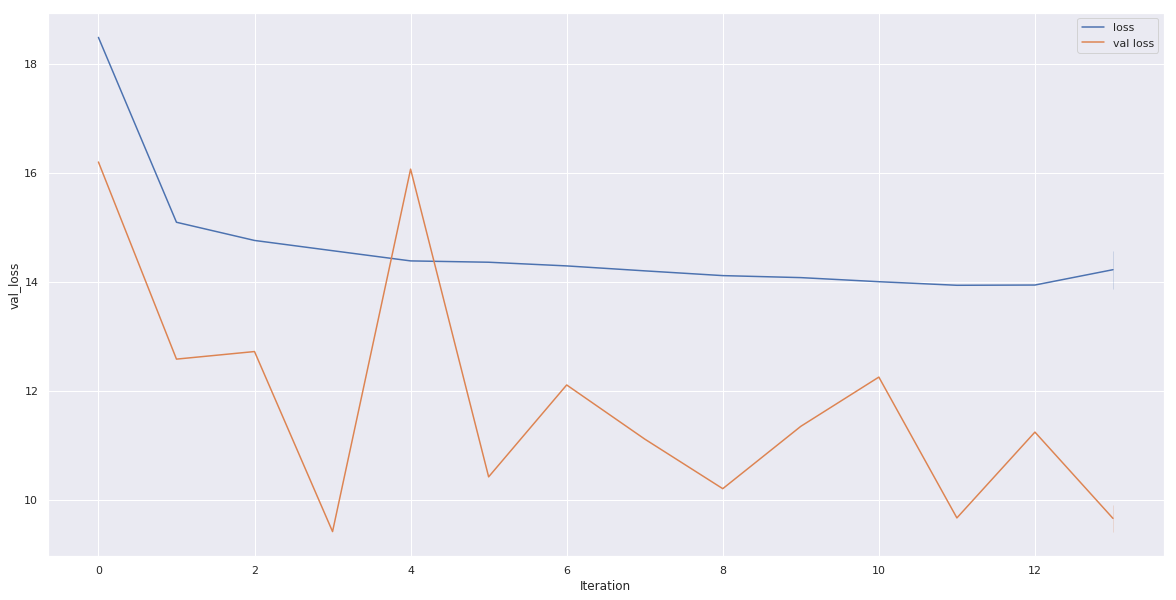

In [7]:
loss_plot(best_random_search_trial)

In [8]:
view_hyper_params(best_random_search_trial)

net_type : conservation
loss_type : weak_loss
lr : 0.00963768221132495
num_layers : 4
dropout : 0.11446994944525204
batch_norm : 0
Trial-ID : 6
val_loss : 9.413344802157717


This model can be found in `SherpaResults/fluxbypass_aqua_random_search/conservation_weak_loss/output/Models/6.json`

# Local Search

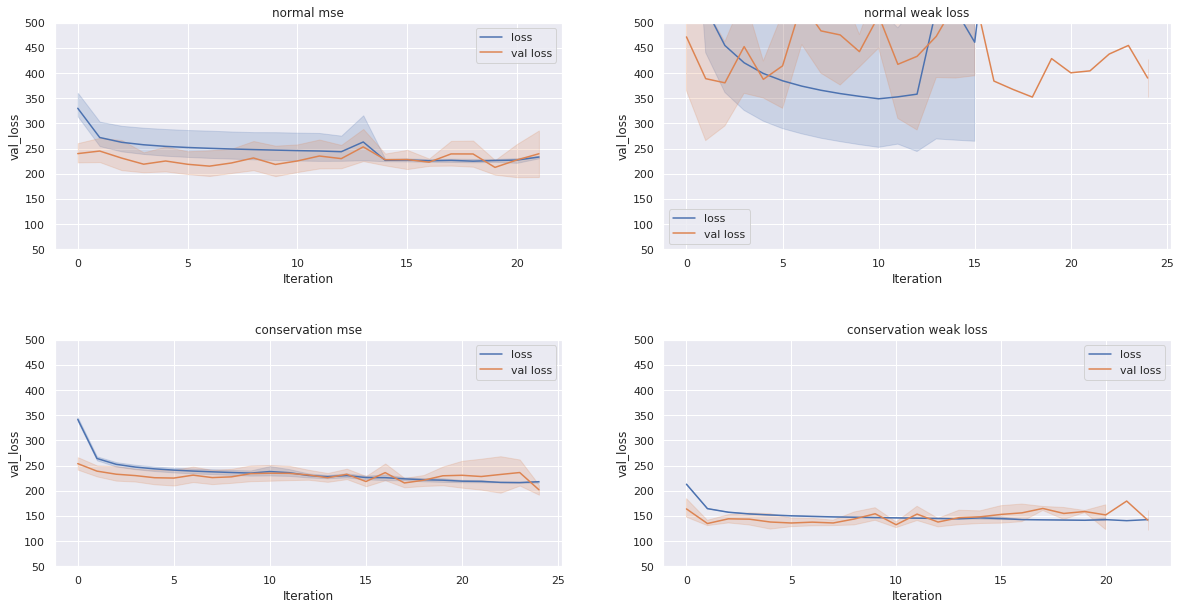

In [10]:
best_local_search_trial = plot('fluxbypass_aqua')

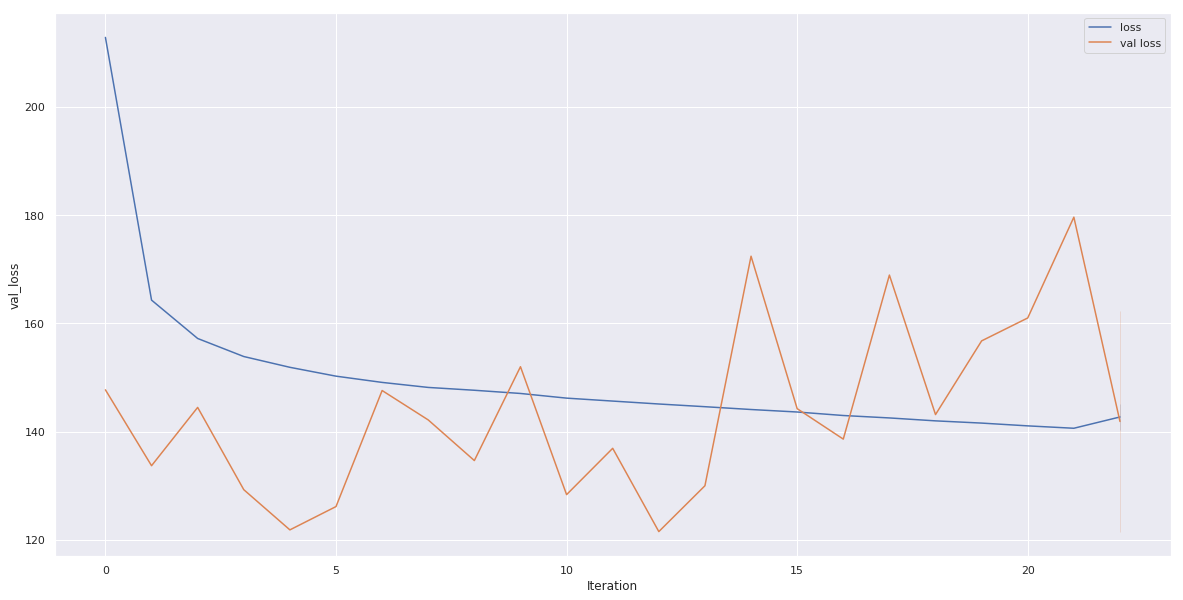

In [11]:
loss_plot(best_local_search_trial)

# Best Configuration

In [12]:
view_hyper_params(best_local_search_trial)

net_type : conservation
loss_type : weak_loss
lr : 0.001
num_layers : 5
dropout : 0.25
batch_norm : 0
Trial-ID : 1
val_loss : 121.54875926471732


This model can be found in `SherpaResults/fluxbypass_aqua/normal_weak_loss/output/Models/1.json`